In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf #needed for models in this script
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
pd.set_option('html', True) #see the dataframe in a more user friendly manner
%matplotlib inline

## Explanation of Multivariate Analysis

In multivariate analysis, we again test the coefficients for their significance to understand the relationship between them and "y". Adding new variables can increase the number of issues one has to juggle to produce a model.

The first issue is that with many variables, it often becomes difficult to visualize all the possible relationships. With a single "y" and a single "x", we can plot the two using a standard two-dimensional plot and try to visually gauge the strength of their relationship. This process can be extended to multiple variables—you can plot all your possible explanatory variables and then pick the one with the strongest visual correlation with "y". If you wanted to, you could take the residuals of this regression you created and then try to plot the remaining explanatory variables against these residuals and add the variable to the original equation. This process can be repeated for many steps. Some more formal techniques, like stepwise regressions, extend this intuition in a more rigorous way, iteractively adding (or subtracting) a single variable that has the most explanatory power in the current version of the model.

Producing graphs over and over again is obviously tedious and it may not be a terribly effective technique without serious modifications. Rather than relying on visual plots, we often start with a correlation matrix that is a square matrix with the correlations of all candidate variables. A correlation matrix not only shows which variables have the strongest relationship with the response variable, but it can show which variables have a strong relationship with each other, a concept that is important in multivariable linear models. For those who still want a visual analysis, there are lattice graphs that combine 2-dimensional correlation plots into a single compact graph.

The process of deciding which variables to add to a model is often shaped by the goal of the modeling process. If the goal is simply to boost the R-squared (it shouldn't be), then adding as many variables as possible will do the trick. Adding extra variables will never subtract from R-squared, so most novice modelers will often make the mistake of throwing in as much data as they can get their hands on in order to boost the R-squared measure of the model.

The problem with this approach is that it exposes to model to overfitting. Overfitting a model involves fitting a model so tightly to the existing data that the model sacrifices accuracy when it encounters new data. This is a prevalent issue when trying to forecast data; overfitting a model to the current batch of data makes it a worse predictor when it is used to predict results not used to fit the original model. To get around this issue, formal modeling techniques use a penalty like Akaike's Information Criterion (AIC) or the Bayesian Information Criterion (BIC) which handicap a model's fit based on the number of parameters used.

Another issue with adding variables to a model is the notion of collinearity. Collinearity occurs when the explanatory variables of a model are related to one another. While this relationship may not affect the overall accuracy of the model, it makes it hard to interpret the impact of individual variables on the response variable, often a key goal of modeling. For example, if one were modeling fuel efficiency, one may try to incorporate weight and size (length and width) of the car into the model. Both of these variables when modeled individually would have a strong relationship with efficiency. However, when thrown into the same model, because they are closely related (bigger cars tend to weigh more) will likely affect the measures of significance of the coefficients. It often happens that when adding a new variable to a model in which all variables are significant, some of these old variables will become insignificant. The reason for this is that the new variable was linearly related to some of the old variables.

When adding new variables, keep in mind that new variables may not only be linearly related to the explanatory variable. It is often important to try various transformations (log, power) of the explanatory variable to improve a model. Also, two explanatory variables actually multiply the effects of one another, not just add to them. This multiplicative effect is known as interaction.

Finally, when creating a model with even one factor, it may not be clear if the explanatory factor is having a direct impact on the response variable or operating through a confounding factor. An example of this is using brand preference for a phone to determine voting preferences. The type of phone one owns is not likely to influence voting patterns, but the social-economic status and location (both confounding factors) of a customer may influence phone choice as well as voting decisions.

For more information on this topic, watch the lectures on multiple regression (https://www.youtube.com/watch?v=eLpfEml4Vak) and interpreting regression models (https://www.youtube.com/watch?v=7rJ7EkB_gTM&list=UUsF1NvsObHQ33-alJ_RuBIw&index=47) lectures by Jason Delaney.

## Multiple Regression Using Statsmodels

Notebook to Follow: http://nbviewer.ipython.org/urls/s3.amazonaws.com/datarobotblog/notebooks/multiple_regression_in_python.ipynb#appendix

In Ordinary Least Squares Regression with a single variable we described the relationship between the predictor and the response with a straight line. In the case of multiple regression we extend this idea by fitting a p-dimensional hyperplane to our p predictors. 
We can show this for two predictor variables in a three dimensional plot. In the following example we will use the advertising dataset which consists of the sales of products and their advertising budget in three different media TV, radio, newspaper.

In [3]:
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


The multiple regression model describes the response as a weighted sum of the predictors:

Sales=β0+β1×TV+β2×Radio

This model can be visualized as a 2-d plane in 3-d space:

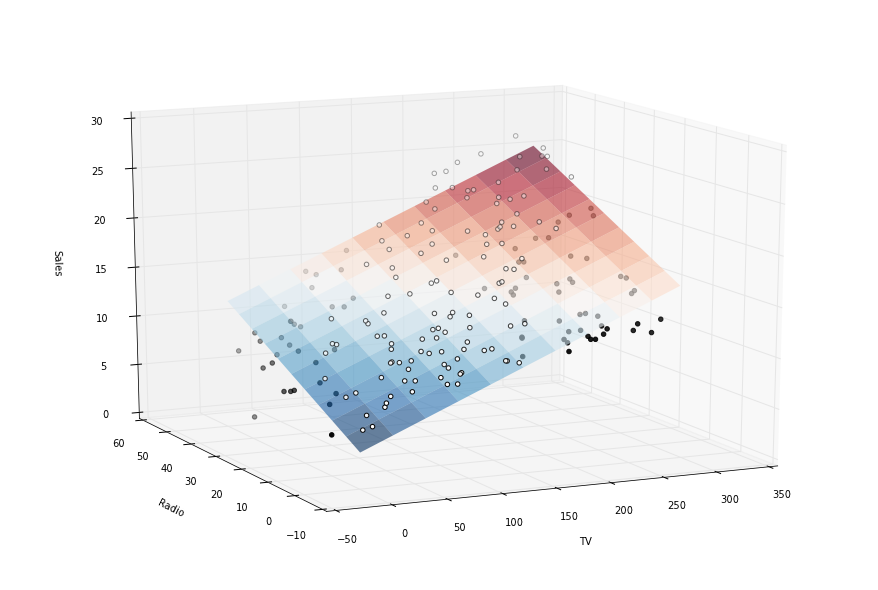

In [8]:
#code to create at bottom

The plot above shows data points above the hyperplane in white and points below the hyperplane in black. The color of the plane is determined by the corresonding predicted Sales values (blue = low, red = high). The Python code to generate the 3-d plot can be found in the appendix.

Just as with the single variable case, calling est.summary will give us detailed information about the model fit. You can find a description of each of the fields in the tables below in the previous blog post here: http://www.datarobot.com/blog/ordinary-least-squares-in-python/

In [4]:
X = df_adv[['TV', 'Radio']] #excluding Newspaper because it has little effect on sales when you include it; 
#better to isolate the two main drivers
y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 21 Oct 2015   Prob (F-statistic):           4.83e-98
Time:                        12:26:53   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
Radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Handling Categorical Variables

Often in statistical learning and data analysis we encounter variables that are not quantitative. A common example is gender or geographic region. We would like to be able to handle them naturally. Here is a sample dataset investigating chronic heart disease.

In [3]:
df = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data', index_col=0)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
# The dependant variable we are trying to model will be 'chd' - whether or not someone has chronic
# heart disease so we will isolate that variable:
chd_data = df.copy() #copy data_frame
chd_status = chd_data.pop('chd') #pop 'chd' off and into series

print chd_status.head()
print type(chd_status)
print 'length: ', len(chd_status)

row.names
1    1
2    1
3    0
4    1
5    1
Name: chd, dtype: int64
<class 'pandas.core.series.Series'>
length:  462


The variable famhist holds if the patient has a family history of coronary artery disease. The percentage of the response chd (chronic heart disease ) for patients with absent/present family history of coronary artery disease is:

In [5]:
# compute percentage of chronic heart disease based on family history of that disease (var: famhist)
chd_status.groupby(chd_data.famhist).mean() 
# groupby famhist (Present, Absent); then look at the chd variable 
# and calculate what percentage of patients have chd for each group. 
# Below will show the steps to get to the figures:

famhist
Absent     0.237037
Present    0.500000
Name: chd, dtype: float64

In [6]:
test_chd = df[(df['famhist'] == 'Absent')]
test_chd1 = df[(df['famhist'] == 'Present')]

print 'Absent'
print test_chd.chd.value_counts()
print len(test_chd)
print test_chd.chd.mean()
print ''
print 'Present'
print test_chd1.chd.value_counts()
print len(test_chd1)
print test_chd1.chd.mean()

Absent
0    206
1     64
dtype: int64
270
0.237037037037

Present
1    96
0    96
dtype: int64
192
0.5


What has happened is: There are 270 instances where family history showed 'Absent' for CHD. Of those 270 instances, 64 had CHD; thus 0.237 of instances. In the case where Family History showed 'Present', there were 192 instances in the data and 96 of those instances had CHD; which is 0.5 of instances. The original code: chd_status.groupby(chd_data.famhist).mean() does these calculations for us. 

These two levels (absent/present) have a natural ordering to them, so we can perform linear regression on them, after we convert them to numeric. This can be done using pd.Categorical.

In [7]:
# encode df.famhist as a numeric: 
df['famhist_ord'] = pd.Categorical(df.famhist).codes
#this creates a new column that converts 'object' datatypes into numeric codes, in this case converting
# 'Present' to 1 and 'Absent' to 0
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,famhist_ord
row.names,,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,0
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,1
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,1


In [8]:
df.dtypes

sbp              int64
tobacco        float64
ldl            float64
adiposity      float64
famhist         object
typea            int64
obesity        float64
alcohol        float64
age              int64
chd              int64
famhist_ord       int8
dtype: object

In [9]:
#create an OLS regression model: 
est = smf.ols(formula="chd ~ famhist_ord", data=df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     36.86
Date:                Wed, 21 Oct 2015   Prob (F-statistic):           2.66e-09
Time:                        18:12:02   Log-Likelihood:                -294.59
No. Observations:                 462   AIC:                             593.2
Df Residuals:                     460   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.2370      0.028      8.489      0.000         0.182     0.292
famhist_ord     0.2630      0.043      6.071      0.000         0.178     0.348
==============================================================================
Omnibus:                      768.898   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.778
Skew:                           0.579   Prob(JB):                     1.72e-13
Kurtosis:                       1.692   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There are several possible approaches to encode categorical values, and statsmodels has built-in support for many of them. In general these work by splitting a categorical variable into many different binary variables. The simplest way to encode categoricals is "dummy-encoding" which encodes a k-level categorical variable into k-1 binary variables. In statsmodels this is done easily using the C() function.

In [11]:
# a utility function to only show the coeff section of summary; If wanted. 
from IPython.core.display import HTML
def short_summary(est):
    return HTML(est.summary().tables[1].as_html())

# fit OLS on categorical
est1 = smf.ols(formula='chd ~ C(famhist)', data=df).fit() #the C()function converts to numeric for us, as opposed to us having
# to do it ourselves in the above example.
short_summary(est1)

In [12]:
short_summary(est)

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,0.2370,0.028,8.489,0.000,0.182 0.292
famhist_ord,0.2630,0.043,6.071,0.000,0.178 0.348


Both methods produced identical results, as we would expect.

## Interactions

Now that we have covered categorical variables, interaction terms are easier to explain.

In [5]:
# We might be interested in studying the relationship between doctor visits (mdvis) 
# and both log income* and the binary variable health status (hlthp)

health_data = pd.read_csv('randhie.csv')
health_data.head()

# *log income to reduce skewness 

,plan,site,coins,tookphys,year,zper,black,income,xage,female,...,logc,fmde,hlthg,hlthf,hlthp,xghindx,linc,lnum,lnmeddol,binexp
0,3,1,100,0,1,125024,1,13748.76,42.87748,0,...,0,0,1,0,0,65.2078,9.528776,1.386294,2.134299,1
1,3,1,100,0,2,125024,1,13748.76,43.87748,0,...,0,0,1,0,0,65.2078,9.528776,1.386294,4.128351,1
2,3,1,100,0,3,125024,1,13748.76,44.87748,0,...,0,0,1,0,0,65.2078,9.528776,1.386294,NaN,0
3,3,1,100,0,4,125024,1,13748.76,45.87748,0,...,0,0,1,0,0,65.2078,9.528776,1.386294,NaN,0
4,3,1,100,0,5,125024,1,13748.76,46.87748,0,...,0,0,1,0,0,65.2078,9.528776,1.386294,NaN,0


Histogram; Income Normal


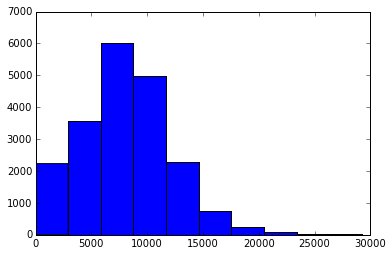

In [7]:
print 'Histogram; Income Normal'
plt.hist(health_data.income, histtype='bar')
plt.show()

Histogram; Log Income


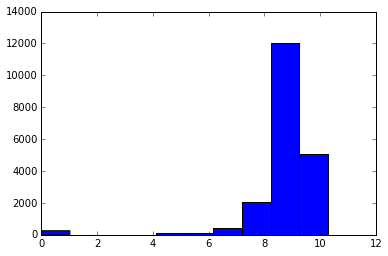

In [8]:
# convert income to log:
health_data["logincome"] = np.log1p(health_data.income)

print 'Histogram; Log Income'
plt.hist(health_data.logincome, histtype='bar')
plt.show()

In [10]:
# take the columns we want to model:
health_data = health_data.loc[:,('mdvis', 'logincome', 'hlthp')]
health_data.head(2)

,mdvis,logincome,hlthp
0,0,9.528777,0
1,2,9.528777,0


,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,0.2725,0.227,1.200,0.230,-0.173 0.718
logincome,0.2916,0.026,11.310,0.000,0.241 0.342
hlthp,3.2778,0.261,12.566,0.000,2.767 3.789


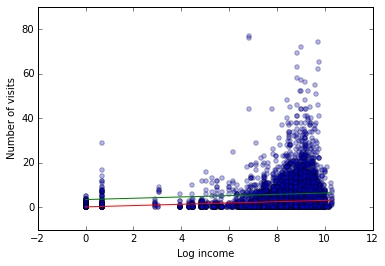

In [12]:
# Because hlthp is a binary variable we can visualize the linear regression model by plotting two 
# lines: one for hlthp == 0 and one for hlthp == 1.

plt.scatter(health_data.logincome, health_data.mdvis, alpha=0.3)
plt.xlabel('Log income')
plt.ylabel('Number of visits')

income_linspace = np.linspace(health_data.logincome.min(), health_data.logincome.max(), 100)

est = smf.ols(formula='mdvis ~ logincome + hlthp', data=health_data).fit()

plt.plot(income_linspace, est.params[0] + est.params[1] * income_linspace + est.params[2] * 0, 'r')
plt.plot(income_linspace, est.params[0] + est.params[1] * income_linspace + est.params[2] * 1, 'g')
short_summary(est)

Notice that the two lines are parallel. This is because the categorical variable affects only the intercept and not the slope (which is a function of logincome).

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,0.5217,0.234,2.231,0.026,0.063 0.980
hlthp,-0.4991,0.890,-0.561,0.575,-2.243 1.245
logincome,0.2630,0.027,9.902,0.000,0.211 0.315
hlthp:logincome,0.4868,0.110,4.441,0.000,0.272 0.702


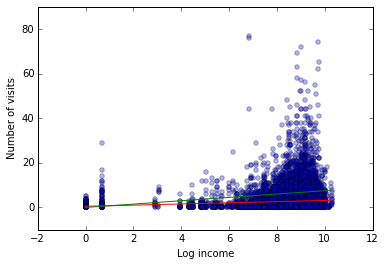

In [14]:
# We can then include an interaction term to explore the effect of an interaction between the two 
# -- i.e. we let the slope be different for the two categories.

plt.scatter(health_data.logincome, health_data.mdvis, alpha=0.3)
plt.xlabel('Log income')
plt.ylabel('Number of visits')

est = smf.ols(formula='mdvis ~ hlthp * logincome', data=health_data).fit()

plt.plot(income_linspace, est.params[0] + est.params[1] * 0 + est.params[2] * income_linspace + 
         est.params[3] * 0 * income_linspace, 'r')
plt.plot(income_linspace, est.params[0] + est.params[1] * 1 + est.params[2] * income_linspace + 
         est.params[3] * 1 * income_linspace, 'g')

short_summary(est)

The * in the formula means that we want the interaction term in addition each term separately (called main-effects). If you want to include just an interaction, use : instead. This is generally avoided in analysis because it is almost always the case that, if a variable is important due to an interaction, it should have an effect by itself.

To summarize what is happening here:

1) If we include the category variables without interactions we have two lines, one for hlthp == 1 and one for hlthp == 0, with all having the same slope but different intercepts.

2) If we include the interactions, now each of the lines can have a different slope. This captures the effect that variation with income may be different for people who are in poor health than for people who are in better health.

## Polynomial regression

Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

A very popular non-linear regression technique is Polynomial Regression, a technique which models the relationship between the response and the predictors as an n-th order polynomial. The higher the order of the polynomial the more "wigglier" functions you can fit. Using higher order polynomial comes at a price, however. First, the computational complexity of model fitting grows as the number of adaptable parameters grows. Second, more complex models have a higher risk of overfitting. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

To illustrate polynomial regression we will consider the Boston housing dataset. We'll look into the task to predict median house values in the Boston area using the predictor lstat, defined as the "proportion of the adults without some high school education and proportion of male workes classified as laborers" (see Hedonic House Prices and the Demand for Clean Air, Harrison & Rubinfeld, 1978).

In [15]:
# load the boston housing dataset - median house values in the Boston area
boston_data = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv')
boston_data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
#isolate the variables we are interested in modelling:
boston_data = boston_data.loc[:,('lstat', 'medv')]
boston_data.head(2)

,lstat,medv
0,4.98,24.0
1,9.14,21.6


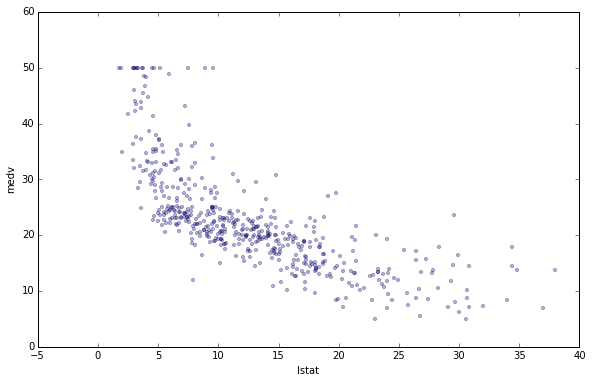

In [17]:
# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(boston_data.lstat, boston_data.medv, s=10, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

In [19]:
# points linearlyd space on lstats
boston_x = pd.DataFrame({'lstat': np.linspace(boston_data.lstat.min(), boston_data.lstat.max(), 100)})
boston_x.tail()

,lstat
95,36.505758
96,36.871818
97,37.237879
98,37.603939
99,37.970000


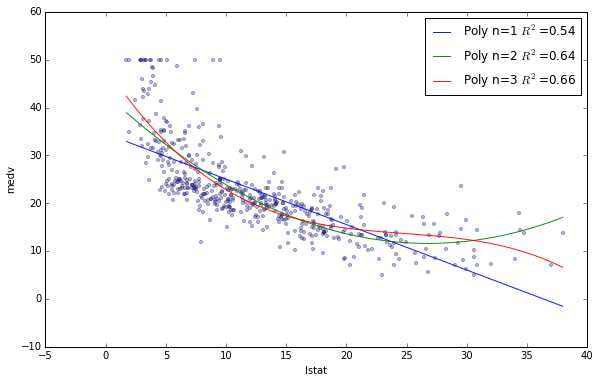

In [24]:
#Plot different order polynomials on original scatterplot:
#repeat above graph:
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(boston_data.lstat, boston_data.medv, s=10, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

# 1-st order polynomial
poly_1 = smf.ols(formula='medv ~ 1 + lstat', data=boston_data).fit()
plt.plot(boston_x.lstat, poly_1.predict(boston_x), 'blue', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='medv ~ 1 + lstat + I(lstat ** 2.0)', data=boston_data).fit()
plt.plot(boston_x.lstat, poly_2.predict(boston_x), 'green', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='medv ~ 1 + lstat + I(lstat ** 2.0) + I(lstat ** 3.0)', data=boston_data).fit()
plt.plot(boston_x.lstat, poly_3.predict(boston_x), 'red', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()
plt.show()

In the legend of the above figure, the R2 value for each of the fits is given. R2 is a measure of how well the model fits the data: a value of one means the model fits the data perfectly while a value of zero means the model fails to explain anything about the data. The fact that the R2 value is higher for the quadratic model shows that it fits the model better than the Ordinary Least Squares model. These R2 values have a major flaw, however, in that they rely exclusively on the same data that was used to train the model. Later on in this series of blog posts, we'll describe some better tools to assess models.

In [ ]:
***********************************CODE TO GENERATE 3D PLOT**************************************

In [ ]:
# Code to Generate 3d plot at beginning:
from mpl_toolkits.mplot3d import Axes3D

X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

## Multivariate Analysis of Loan Data

In [3]:
#using the same dataset as before; introduce more variables into the analysis. 
# ************** NOTE ***********************
#Instructions on Thinkful are UNCLEAR and thus, I'm moving forward with the cleaned dataset from previous lessons. 

In [4]:
#load cleaned data:
loanData = pd.read_csv('loansData_clean.csv')
loanData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score
0,20000,20000,0.089,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year,735
1,19200,19200,0.121,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years,715
2,35000,35000,0.220,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years,690
3,10000,9975,0.100,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years,695
4,12000,12000,0.117,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years,695


In [5]:
print loanData['Amount.Requested'].sum()
print loanData['Monthly.Income'].sum()
print loanData['Interest.Rate'].sum()

31016250
14216639.37
326.629


In [6]:
#take only the columns we are interested in (annual_inc, int_rate, home_ownership)
loanData1 = loanData.loc[:,('Interest.Rate', 'Monthly.Income', 'Home.Ownership','FICO.Score','Amount.Requested')]
loanData1.head()

,Interest.Rate,Monthly.Income,Home.Ownership,FICO.Score,Amount.Requested
0,0.089,6541.67,MORTGAGE,735,20000
1,0.121,4583.33,MORTGAGE,715,19200
2,0.220,11500.00,MORTGAGE,690,35000
3,0.100,3833.33,MORTGAGE,695,10000
4,0.117,3195.00,RENT,695,12000


In [7]:
loanData1.dtypes

Interest.Rate       float64
Monthly.Income      float64
Home.Ownership       object
FICO.Score            int64
Amount.Requested      int64
dtype: object

In [8]:
#any nan values to clean?
print 'Before:' 
print loanData1.isnull().sum()

#drop any NAN values:
loanData1 = loanData1.dropna()

#confirmed dropped
print ''
print 'After:'
print loanData1.isnull().sum()

Before:
Interest.Rate       0
Monthly.Income      1
Home.Ownership      0
FICO.Score          0
Amount.Requested    0
dtype: int64

After:
Interest.Rate       0
Monthly.Income      0
Home.Ownership      0
FICO.Score          0
Amount.Requested    0
dtype: int64


In [9]:
loanData1.dtypes

Interest.Rate       float64
Monthly.Income      float64
Home.Ownership       object
FICO.Score            int64
Amount.Requested      int64
dtype: object

In [10]:
#create series with the columns we want in the model:
int_rate = loanData1['Interest.Rate']
month_inc = loanData1['Monthly.Income']
home_status = loanData1['Home.Ownership']
fico = loanData1['FICO.Score']
loan_amt = loanData1['Amount.Requested']

In [11]:
import collections
#convert 'home_status' to int based on value: 
# 3 for Own, 2 for Mortgage, 1 for Rent and 0 for Other
home_status = [4 if x == 'OWN' else 3 if x == 'MORTGAGE' else 2 if x == 'RENT' else 1 if x == 'OTHER' \
                   else 0 for x in home_status]

print loanData1['Home.Ownership'].value_counts() #see original counts
print collections.Counter(home_status) #see new numeric counts; should match

MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
dtype: int64
Counter({3: 1148, 2: 1146, 4: 200, 1: 5})


Convert variables into matrixes for modeling:

In [12]:
#dependant variable for both models:
IntRate = np.matrix(int_rate).transpose()
print IntRate[:5]
print sum(IntRate)

[[ 0.089]
 [ 0.121]
 [ 0.22 ]
 [ 0.1  ]
 [ 0.117]]
[[ 326.555]]


In [13]:
#independant variables:
FICO = np.matrix(fico).transpose()
print FICO[:5]
print sum(FICO)
print ''
LoanAmount = np.matrix(loan_amt).transpose()
print LoanAmount[:5]
print sum(LoanAmount)
print ''
MonInc = np.matrix(month_inc).transpose()
print MonInc[:5]
print sum(MonInc)
print ''
HomeStatus = np.matrix(home_status).transpose()
print HomeStatus[:5]
print sum(HomeStatus)
print ''

[[735]
 [715]
 [690]
 [695]
 [695]]
[[1763920]]

[[20000]
 [19200]
 [35000]
 [10000]
 [12000]]
[[31011250]]

[[  6541.67]
 [  4583.33]
 [ 11500.  ]
 [  3833.33]
 [  3195.  ]]
[[ 14216639.37]]

[[3]
 [3]
 [3]
 [3]
 [2]]
[[6541]]



## Model Interest Rate without Home Ownership

In [14]:
np.set_printoptions(suppress=True) #suppress scientific notation for easier reading

In [16]:
#Stack the Variables we want to use for the model:
stacked_run1 = np.column_stack([FICO,LoanAmount,MonInc])
print stacked_run1[:5]
print ''
print sum(stacked_run1)

[[   735.    20000.     6541.67]
 [   715.    19200.     4583.33]
 [   690.    35000.    11500.  ]
 [   695.    10000.     3833.33]
 [   695.    12000.     3195.  ]]

[[  1763920.    31011250.    14216639.37]]


In [17]:
#create model:
run1 = sm.add_constant(stacked_run1)
model_run1 = sm.OLS(IntRate,run1)
run1_fitted = model_run1.fit()

#show summary:
result_run1 = run1_fitted.summary()
result_run1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1613.
Date:                Tue, 20 Oct 2015   Prob (F-statistic):               0.00
Time:                        15:24:01   Log-Likelihood:                 5734.3
No. Observations:                2499   AIC:                        -1.146e+04
Df Residuals:                    2495   BIC:                        -1.144e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7279      0.010     73.688      0.000         0.709     0.747
x1            -0.0009   1.41e-05    -62.549      0.000        -0.001    -0.001
x2          2.236e-06    6.8e-08     32.869      0.000       2.1e-06  2.37e-06
x3         -6.374e-07   1.34e-07     -4.741      0.000     -9.01e-07 -3.74e-07
==============================================================================
Omnibus:                       70.934   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.339
Skew:                           0.385   Prob(JB):                     5.91e-18
Kurtosis:                       3.410   Cond. No.                     3.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#Get the fitted coefficients from the results:
coeff_run1 = run1_fitted.params
print coeff_run1

[ 0.72792692 -0.00088032  0.00000224 -0.00000064]


## Model Interest Rate without Home Ownership Method 2

In [30]:
InD = loanData1[['Monthly.Income', 'FICO.Score', 'Amount.Requested']] #independant variables
DeP = loanData1['Interest.Rate'] #what we are trying to predict

#create model:
run2 = sm.add_constant(InD)
model_run2 = sm.OLS(DeP,run2)
run2_fitted = model_run2.fit()

#show summary:
result_run2 = run2_fitted.summary()
result_run2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest.Rate   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1613.
Date:                Tue, 20 Oct 2015   Prob (F-statistic):               0.00
Time:                        16:53:48   Log-Likelihood:                 5734.3
No. Observations:                2499   AIC:                        -1.146e+04
Df Residuals:                    2495   BIC:                        -1.144e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                0.7279      0.010     73.688      0.000         0.709     0.747
Monthly.Income   -6.374e-07   1.34e-07     -4.741      0.000     -9.01e-07 -3.74e-07
FICO.Score          -0.0009   1.41e-05    -62.549      0.000        -0.001    -0.001
Amount.Requested  2.236e-06    6.8e-08     32.869      0.000       2.1e-06  2.37e-06
==============================================================================
Omnibus:                       70.934   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.339
Skew:                           0.385   Prob(JB):                     5.91e-18
Kurtosis:                       3.410   Cond. No.                     3.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#Get the fitted coefficients from the results:
coeff_run2 = run2_fitted.params
print coeff_run2

const               7.279269e-01
Monthly.Income     -6.374493e-07
FICO.Score         -8.803163e-04
Amount.Requested    2.235821e-06
dtype: float64


## Repeat Model with Home Ownership Included; Method 2 Style with Column call for Clarity

In [ ]:
#need to replace values in Home.Ownership for this method to work correctly:
loanData1 = loanData1.replace({'Home.Ownership':{'OWN':4,'MORTGAGE':3,'RENT':2, 'OTHER':1}})
print loanData1.head(2)
print loanData1.dtypes

In [32]:
InD_home = loanData1[['Monthly.Income', 'FICO.Score', 'Amount.Requested','Home.Ownership']] #independant variables
DeP_home = loanData1['Interest.Rate'] #what we are trying to predict

#create model:
run3 = sm.add_constant(InD_home)
model_run3 = sm.OLS(DeP_home,run3)
run3_fitted = model_run3.fit()

#show summary:
result_run3 = run3_fitted.summary()
result_run3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest.Rate   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1209.
Date:                Tue, 20 Oct 2015   Prob (F-statistic):               0.00
Time:                        16:54:07   Log-Likelihood:                 5734.5
No. Observations:                2499   AIC:                        -1.146e+04
Df Residuals:                    2494   BIC:                        -1.143e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                0.7283      0.010     73.472      0.000         0.709     0.748
Monthly.Income   -6.328e-07   1.35e-07     -4.693      0.000     -8.97e-07 -3.68e-07
FICO.Score          -0.0009   1.42e-05    -62.072      0.000        -0.001    -0.001
Amount.Requested  2.237e-06   6.81e-08     32.849      0.000       2.1e-06  2.37e-06
Home.Ownership      -0.0004      0.001     -0.469      0.639        -0.002     0.001
==============================================================================
Omnibus:                       70.634   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.964
Skew:                           0.384   Prob(JB):                     7.13e-18
Kurtosis:                       3.409   Cond. No.                     3.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#Get the fitted coefficients from the results:
coeff_run3 = run3_fitted.params
print coeff_run3

const               7.283037e-01
Monthly.Income     -6.327522e-07
FICO.Score         -8.795532e-04
Amount.Requested    2.237332e-06
Home.Ownership     -3.671133e-04
dtype: float64


## Test Models - Predict Interest Rates

Models built with the second method produce identical results and are clearer; so we'll use that style moving forward.

In [34]:
#recall dataset to use: 
loanData1.head(2)

,Interest.Rate,Monthly.Income,Home.Ownership,FICO.Score,Amount.Requested
0,0.089,6541.67,3,735,20000
1,0.121,4583.33,3,715,19200


In [35]:
#coefficients for the models
print 'Model 1: Exclude Home Ownership'
print coeff_run2
print ''
print 'Model 2: Include Home Ownership'
print coeff_run3

Model 1: Exclude Home Ownership
const               7.279269e-01
Monthly.Income     -6.374493e-07
FICO.Score         -8.803163e-04
Amount.Requested    2.235821e-06
dtype: float64

Model 2: Include Home Ownership
const               7.283037e-01
Monthly.Income     -6.327522e-07
FICO.Score         -8.795532e-04
Amount.Requested    2.237332e-06
Home.Ownership     -3.671133e-04
dtype: float64


In [38]:
#Predict Interest Rates on our dataset:
loanData1['Predicted.Int.EXCLUDE.Home'] = (coeff_run2[0] + (coeff_run2[1]*loanData1['Monthly.Income']) + \
                                                   (coeff_run2[2]*loanData1['FICO.Score']) + \
                                                   (coeff_run2[3]*loanData1['Amount.Requested']))

loanData1['Predicted.Int.INCLUDE.Home'] = (coeff_run3[0] + (coeff_run3[1]*loanData1['Monthly.Income']) + \
                                                   (coeff_run3[2]*loanData1['FICO.Score']) + \
                                                   (coeff_run3[3]*loanData1['Amount.Requested']) + \
                                                   (coeff_run3[4]*loanData1['Home.Ownership'])) 

loanData1.head(10)

,Interest.Rate,Monthly.Income,Home.Ownership,FICO.Score,Amount.Requested,Predicted.Int.EXCLUDE.Home,Predicted.Int.INCLUDE.Home
0,0.089,6541.67,3,735,20000,0.121441,0.121338
1,0.121,4583.33,3,715,19200,0.138507,0.138378
2,0.220,11500.00,3,690,35000,0.191432,0.191341
3,0.100,3833.33,3,695,10000,0.136022,0.135861
4,0.117,3195.00,2,695,12000,0.140900,0.141106
5,0.153,4891.67,4,670,6000,0.148412,0.147863
6,0.079,2916.67,2,720,10000,0.114598,0.114819
7,0.171,13863.42,3,705,33500,0.173367,0.173296
8,0.143,3150.00,2,685,14675,0.155713,0.155915
9,0.069,5000.00,2,715,7000,0.110964,0.111186


In [74]:
loanData1['excluded_diff_sq'] = (loanData1['Predicted.Int.EXCLUDE.Home'] - loanData1['Interest.Rate'])**2
loanData1['included_diff_sq'] = (loanData1['Predicted.Int.INCLUDE.Home'] - loanData1['Interest.Rate'])**2

loanData1.head(10)

,Interest.Rate,Monthly.Income,Home.Ownership,FICO.Score,Amount.Requested,Predicted.Int.EXCLUDE.Home,Predicted.Int.INCLUDE.Home,excluded_diff,included_diff,excluded_diff_sq,included_diff_sq
0,0.089,6541.67,3,735,20000,0.121441,0.121338,0.032441,0.032338,0.001052,0.001046
1,0.121,4583.33,3,715,19200,0.138507,0.138378,0.017507,0.017378,0.000306,0.000302
2,0.220,11500.00,3,690,35000,0.191432,0.191341,-0.028568,-0.028659,0.000816,0.000821
3,0.100,3833.33,3,695,10000,0.136022,0.135861,0.036022,0.035861,0.001298,0.001286
4,0.117,3195.00,2,695,12000,0.140900,0.141106,0.023900,0.024106,0.000571,0.000581
5,0.153,4891.67,4,670,6000,0.148412,0.147863,-0.004588,-0.005137,0.000021,0.000026
6,0.079,2916.67,2,720,10000,0.114598,0.114819,0.035598,0.035819,0.001267,0.001283
7,0.171,13863.42,3,705,33500,0.173367,0.173296,0.002367,0.002296,0.000006,0.000005
8,0.143,3150.00,2,685,14675,0.155713,0.155915,0.012713,0.012915,0.000162,0.000167
9,0.069,5000.00,2,715,7000,0.110964,0.111186,0.041964,0.042186,0.001761,0.001780


In [75]:
print loanData1['excluded_diff_sq'].sum()
print loanData1['included_diff_sq'].sum()

1.48655314319
1.48642218939


From this perspective; including Home Ownership Status in the model adds nothing to the predcitive power. 